In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [7]:
df = pd.read_csv('C:/Users/hp5cd/Downloads/tested.csv')


In [8]:
df.columns = df.columns.str.strip().str.lower()

In [9]:
print("\n--- Dataset Info ---")
df.info()
print("\n--- Null Values ---")
print(df.isnull().sum())
print("\n--- Data Types ---")
print(df.dtypes)



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  418 non-null    int64  
 1   survived     418 non-null    int64  
 2   pclass       418 non-null    int64  
 3   name         418 non-null    object 
 4   sex          418 non-null    object 
 5   age          332 non-null    float64
 6   sibsp        418 non-null    int64  
 7   parch        418 non-null    int64  
 8   ticket       418 non-null    object 
 9   fare         417 non-null    float64
 10  cabin        91 non-null     object 
 11  embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB

--- Null Values ---
passengerid      0
survived         0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin      

In [10]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(df[col].median())
    elif df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])

In [11]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
low_cardinality = [col for col in categorical_cols if df[col].nunique() < 10]

In [12]:
df = pd.get_dummies(df, columns=low_cardinality, drop_first=True)

In [13]:
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [14]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


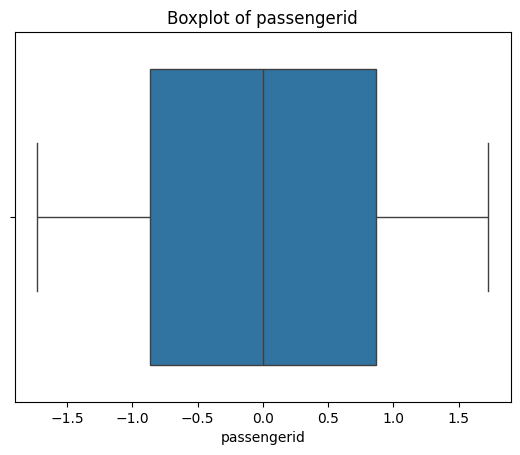

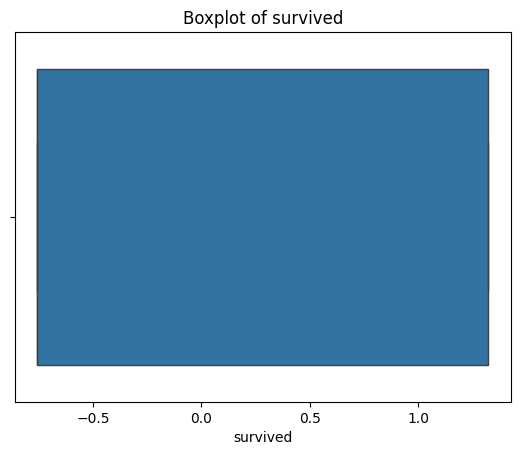

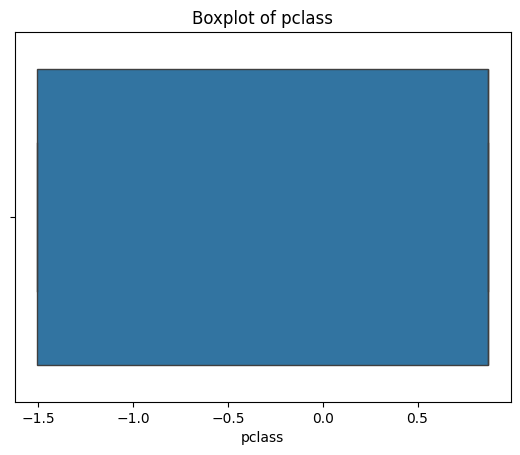

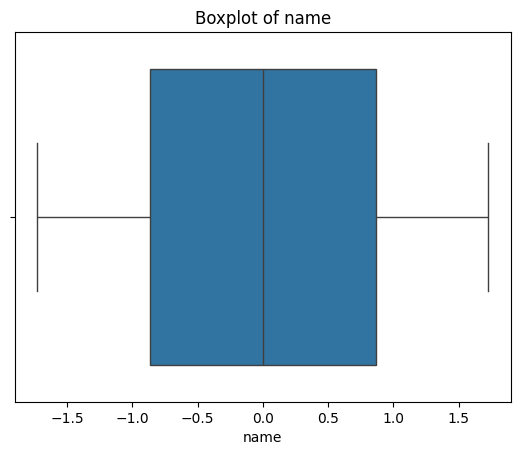

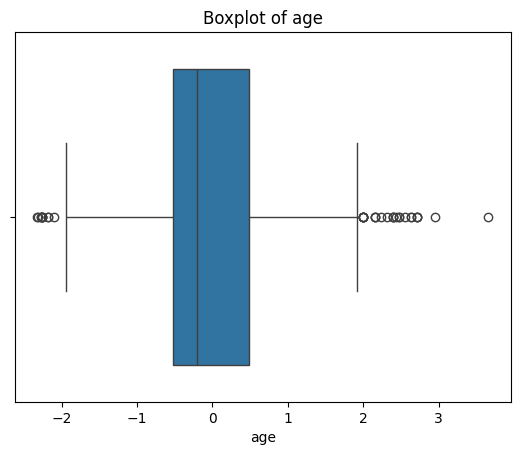

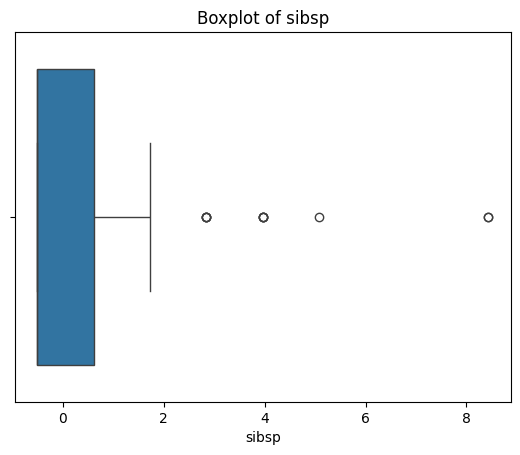

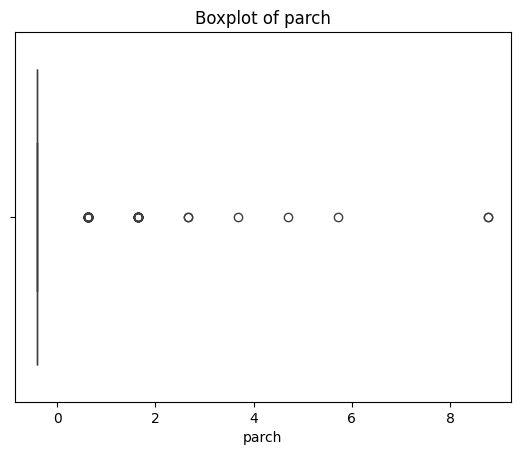

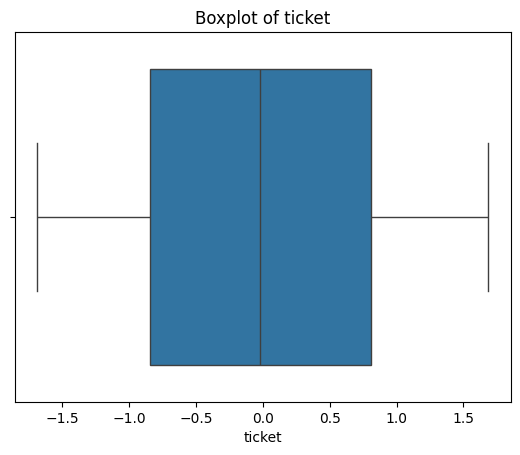

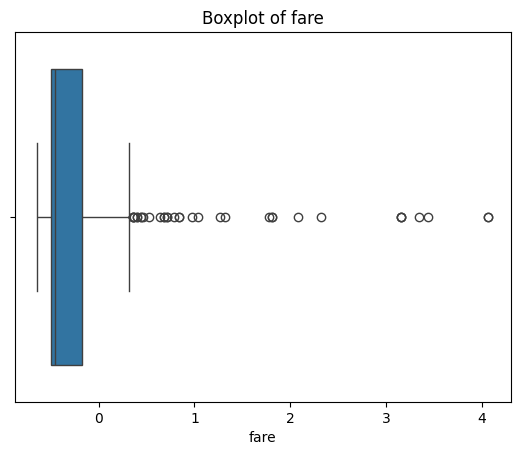

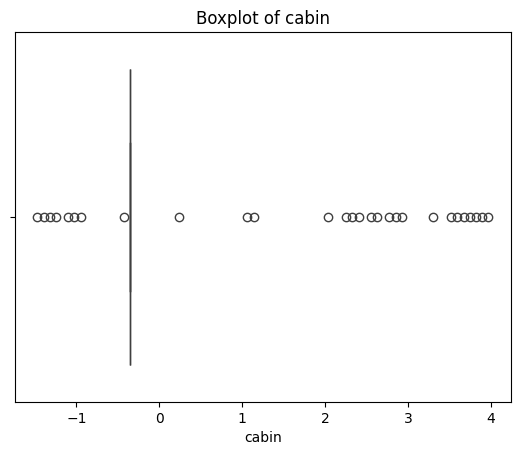

In [15]:
for col in num_cols:
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

In [16]:
df.to_csv('cleaned_tested.csv', index=False)

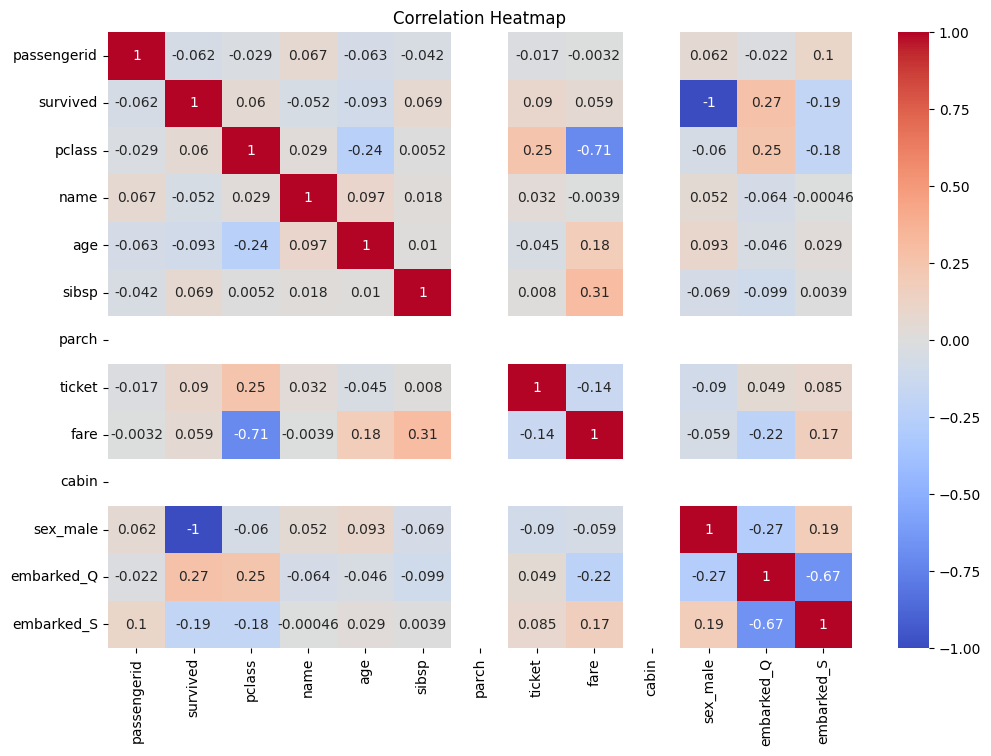

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
